<a href="https://colab.research.google.com/github/MarciaValeria2110/datasat/blob/main/Obesidade_entrega_v7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Marcia Valeria de Souza da Silva

**Matrícula:** 40530010055_20250_01

**Dataset:** Obesidade

#1. Descrição

### A obesidade é um cenário em uma parte da população, e que pode levar a diversas doenças se não for tratada.

### Diversos fatores podem contribuir para que uma pessoa esteja obesa. Fatores como falta de exercício, excesso de alimentos calóricos, falta de uma alimentação balanceada, histórico familiar, entre outros.

### O Objetivo desta análise de dados é explorar os fatores que possam levar a uma pessoa ser obesa e prever cenários que podem contribuir a diminuir a obesidade.

# 1.1 Atributos

### Foram coletados os dados do dataset "ObesityDataSet_raw_and_data_sinthetic", que contém a coleta de dados sobre a informação de 2111 pessoas obesas e não obesas.


# Salvar o Dataset no github e informar aqui o link

In [ ]:
# (colocar o link deste dataset  de acordo com link que vai inserir no github)

##Descrição dos Atributos##
1.	**Gender**- Gênero (Masculino e Feminino)
2.	**Age** – idade
3.	**Height** –  altura em metros
4.	**Weight**- peso em Kg
5.	**family_history_with_overweight** – histórico familiar de sobrepeso
6.	**FAVC** – consumo de comida muito calórica
7.	**FCVC** – consumo de vegetais
8.	**NCP** – numero de refeições principais
9.	**CAEC** – consumo de alimento entre as refeições
10.	**SMOKE** – se fumante
11.	**CH2O** – consumo diário de água em litros
12.	**SCC** – monitoramento do consumo de calorias
13.	**FAF** – frequência de atividade física
14.	**TUE** – Tempo usando dispositivos tecnológicos
15.	**CALC** – consumo de alcool
16.	**MTRANS** – meio de transporte utilizado
17.	**NObeyesdad**  –  tipo de obesidade



## 2. Hipóteses do Problema

### - Analisar os tipos de obesidade podem ocorrer sem sem a realização de exercício fisico, consumo de alimentos muito caloricos, histórico familiar de obesidade, tipos de uso de meio de transporte, consumo de alcool, e demais atributos que podem correlacionar com a obesidade.

### - E assim verificar que também hábitos diários podem influenciar neste aumento de peso.

## Tipo de Problema

###Cenário com classificação supervisionada. Considerando os atributos da lista disponibilizados , prever entre homens e mulheres, idades e hábitos, a que categoria de peso na obesidade pertence e o que prever para a diminuição do peso.

## 3. Biblioteca e carga dos dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as ms # para tratamento de missings
# Transformações Numéricas
from sklearn.preprocessing import StandardScaler #padronização
from sklearn.preprocessing import MinMaxScaler # normalização
# Transformações Categóricas
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding
from sklearn.preprocessing import LabelEncoder # Label Encoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


url_dados = 'https://raw.githubusercontent.com/MarciaValeria2110/datasat/main/ObesityDataSet_raw_and_data_sinthetic.csv'

labels_atributos = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight','FAVC','FCVC','NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS','NObeyesdad']

obesidade = pd.read_csv(url_dados, names=labels_atributos, skiprows=1, delimiter=',')

In [ ]:
#ver se funciona
#obesidade.rename(columns={'Gender':'Gênero'}, {'Age':'Idade'}, {'Height':'Altura(metro)'},{'Weight':'Peso(Kg)'},{'family_history_with_overweight':'Histórico_familiar_de_sobre_peso'})

In [ ]:
# Versão da matplotlib utilizada
mpl.__version__

'3.10.0'

In [ ]:
# para ignorar warning
import warnings
warnings.filterwarnings("ignore")

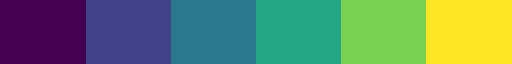

['#440154', '#414487', '#2a788e', '#22a884', '#7ad151', '#fde725']

In [ ]:
# Definindo a paleta de cores para a utilização nos gráficos

# Paleta Viridis também recomendada para pessoas com daltonismo

vcmap = plt.get_cmap("viridis", 6)

# exibe o mapa de cores
display(vcmap)

# converte o mapa de cores em um vetor, para uso de cores individuais

# converte o mapa de cores em um vetor, para uso de cores individuais
coresViridis = [mpl.colors.rgb2hex(vcmap(i)) for i in range(6)] # extrai lista de cores em hex
display(coresViridis)

# define uma cor default
corDefault = coresViridis[1]

# Carrega uma folha de estilos (opcional - questões estéticas)
plt.style.use("ggplot")

# Melhorando a estética modificando mais alguns parâmetros gráficos
# eixo e grade dos gráficos
plt.rc("axes", facecolor="#fafafa", grid = True)
plt.rc("grid", color = "#f0f0f0") #
plt.rc("axes", edgecolor="#cccccc", lw=0.1) # 0.1 espessura da borda dos eixos

In [ ]:
# Informação do Dataframe
type(obesidade)

pandas.core.frame.DataFrame

## 3. Análise de Dados
### Na Análise Exploratória sobre a obesidade iremos analisar as características das variáveis que influenciam a obter o excesso de peso.

## Tipo de Instâncias
### o dasaset possui 2111 instâncias, com atributos numéricos do tipo float, e com atributos categóricos.

In [ ]:
print(f"Total de instâncias: {len(obesidade)}")
print("\nTipos de dados por coluna:")
print(obesidade.info())

Total de instâncias: 2111

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-

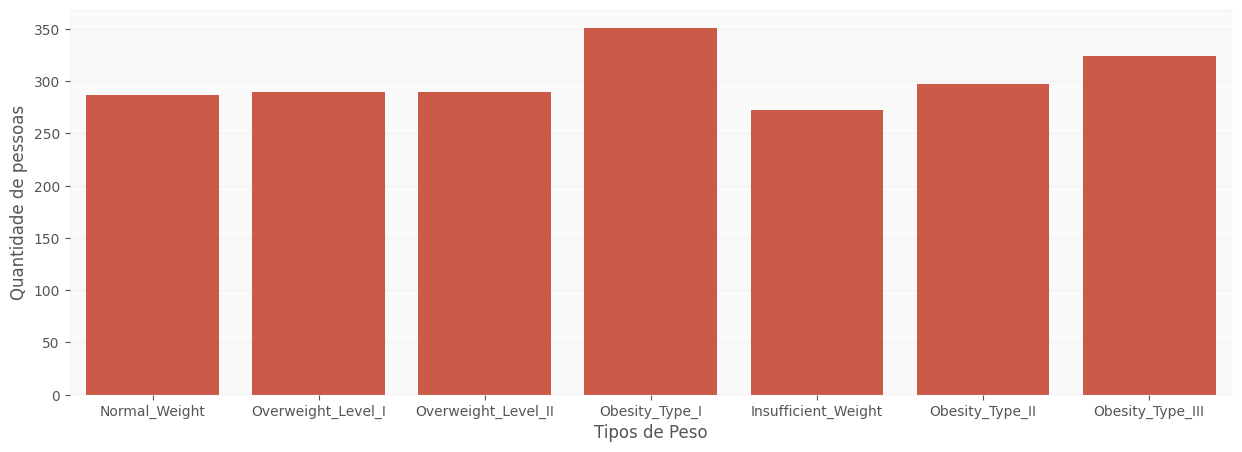

In [ ]:
#Gráfico Seaborn com os tipos de pesos distribuídos entre as 2111 pessoas.

plt.figure(figsize=(15, 5))
# gráfico de barras simples
sns.countplot(x='NObeyesdad', data=obesidade)

plt.xlabel('Tipos de Peso')
plt.ylabel('Quantidade de pessoas')
plt.show()

## 3.1 Estátisticas Descritivas

Exibindo as dimensões do Dataset

In [ ]:
# Mostra as dimensões do dataset
# 2111 linhas e 17 colunas

print(obesidade.shape)

(2111, 17)


In [ ]:
# Mostra as informações do dataset e os tipos das variáveis do atributo
obesidade.dtypes


,0
Gender,object
Age,float64
Height,float64
Weight,float64
family_history_with_overweight,object
FAVC,object
FCVC,float64
NCP,float64
CAEC,object
SMOKE,object


Verificando as estatísticas de resumo nos dados , das linhas e colunas.

In [ ]:
# Mostra as 6 primeiras linhas do dataset com as informações dos seus atributos
obesidade.head(6)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight


In [ ]:
# Mostrando as últimas linhas do dataset com as informações dos seus atributos
obesidade.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
# Mostrando as colunas com os tributos utilizados
obesidade.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [ ]:
# Mostrando a quantidade de linha por cada tipo de coluna
obesidade.count()

,0
Gender,2111
Age,2111
Height,2111
Weight,2111
family_history_with_overweight,2111
FAVC,2111
FCVC,2111
NCP,2111
CAEC,2111
SMOKE,2111


In [ ]:
# mostrando as estatísticas descritivas básicas das colunas numéricas do dataset
# como a média, desvio padrão, mediana e o quartis (25%, 50%, 75%)
# podemos verificar que:
# A média de idade é de 24,3 anos, com o min de 14 e max de 61 anos,
# A média de peso de 86,6 Kg com o min de 39 e max 173Kg
# a média de atividade física(FAF) moderada na escala 0 a 3, tendo a média 1.01

obesidade.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Calculando as estátisticas separadas

In [ ]:
# Calculando a média dos atributos numéricos do dataset
# Mostra a média de peso de 86 Kg
obesidade.describe().loc['mean']

,mean
Age,24.312600
Height,1.701677
Weight,86.586058
FCVC,2.419043
NCP,2.685628
CH2O,2.008011
FAF,1.010298
TUE,0.657866


In [ ]:
# Calculando o desvio padrão dos atributos numéricos do dataset
obesidade.describe().loc['std']

,std
Age,6.345968
Height,0.093305
Weight,26.191172
FCVC,0.533927
NCP,0.778039
CH2O,0.612953
FAF,0.850592
TUE,0.608927


In [ ]:
# mostrando as estatísticas descritivas básicas das colunas NÃO numéricas do dataset
# Onde o total de 2111 indica que não há valores faltantes
# em unique mostra a quantidade de categorias na variável ex: CAEC com 4 categorias
# top indica a categoria mais frequente, neste caso Male para Gender e Obesity_Type_I para NObeyesdad
# freq relacionada a topo aparece por ex 2067 vezes para SMOKE

obesidade.describe(include=['object'])

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [ ]:
# distribuição dos pesos mostra que os pesos estão desbalanceados
# com relação ao peso normal

print(obesidade.groupby('NObeyesdad').size())

NObeyesdad
Insufficient_Weight    272
Normal_Weight          287
Obesity_Type_I         351
Obesity_Type_II        297
Obesity_Type_III       324
Overweight_Level_I     290
Overweight_Level_II    290
dtype: int64


In [ ]:
#Selecionando por linha
# linha 15 a linha 25
obesidade[15:25]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
15,Female,22.0,1.70,66.0,yes,no,3.0,3.0,Always,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
16,Male,27.0,1.93,102.0,yes,yes,2.0,1.0,Sometimes,no,1.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
17,Female,29.0,1.53,78.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,no,Automobile,Obesity_Type_I
18,Female,30.0,1.71,82.0,yes,yes,3.0,4.0,Frequently,yes,1.0,no,0.0,0.0,no,Automobile,Overweight_Level_II
19,Female,23.0,1.65,70.0,yes,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
20,Male,22.0,1.65,80.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,3.0,2.0,no,Walking,Overweight_Level_II
21,Female,52.0,1.69,87.0,yes,yes,3.0,1.0,Sometimes,yes,2.0,no,0.0,0.0,no,Automobile,Obesity_Type_I
22,Female,22.0,1.65,60.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Automobile,Normal_Weight
23,Female,22.0,1.60,82.0,yes,yes,1.0,1.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Obesity_Type_I
24,Male,21.0,1.85,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight


Gráfico com os tipos de Pesos

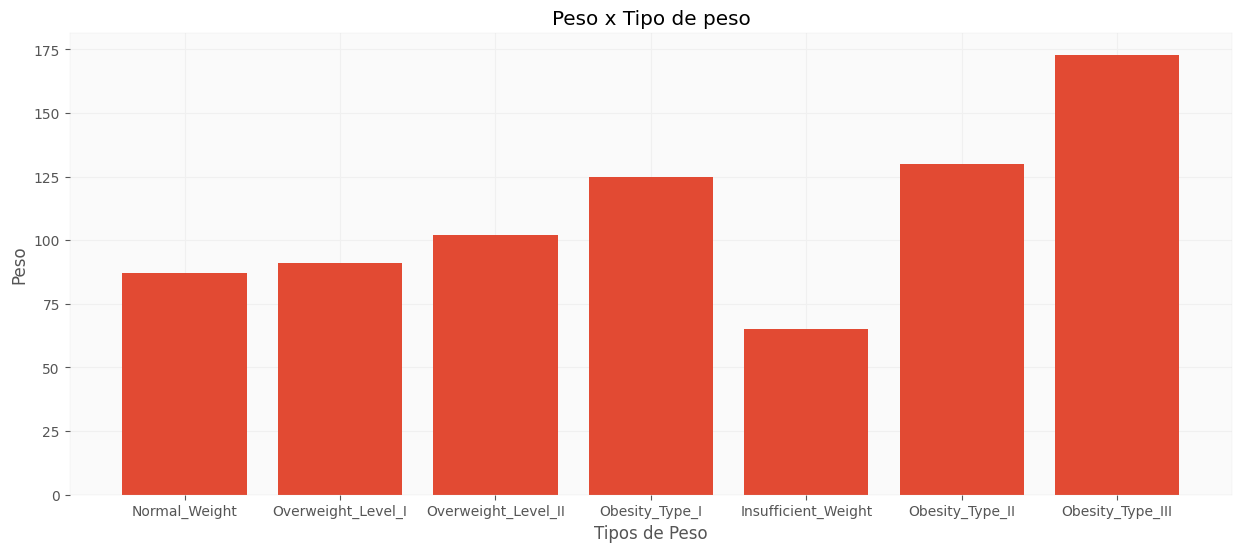

In [ ]:
# Prepara a figura (fig) e a área do gráfico (ax) com a largura 15 e a altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (15, 6))

# Plota o gráfico de barras informando qual é a coluna do Dataframe que queremos tratar
ax.bar(x = obesidade['NObeyesdad'], height = obesidade['Weight'])
plt.title('Peso x Tipo de peso')
plt.ylabel('Peso')
plt.xlabel('Tipos de Peso')
#Exibe o gráfico
plt.show()


Gráfico mostra a média de peso por tipo

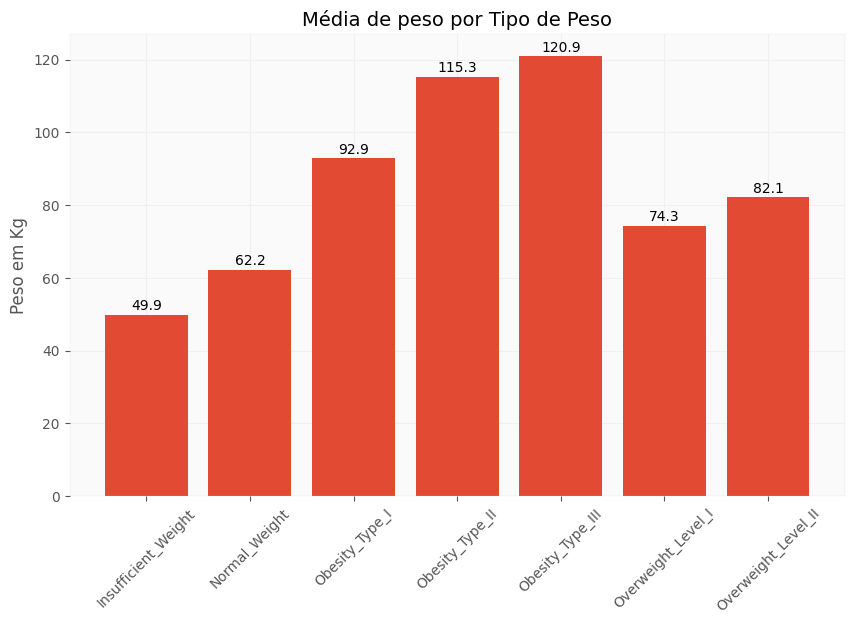

In [ ]:
# Grafico de barras com média de peso por Tipo de Obesidade
fig, (ax) = plt.subplots(1, figsize=(10, 6))

tipo_peso = obesidade.groupby('NObeyesdad')['Weight'].mean().reset_index()
b1 = ax.bar(x=tipo_peso['NObeyesdad'], height=tipo_peso['Weight'])
ax.set_title('Média de peso por Tipo de Peso', fontsize=14)
ax.set_ylabel('Peso em Kg')
ax.tick_params(axis='x', rotation=45)

# Adiciona valores nas barras
for rect in b1.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height + 0.5,
             f'{height:.1f}', ha='center', va='bottom')

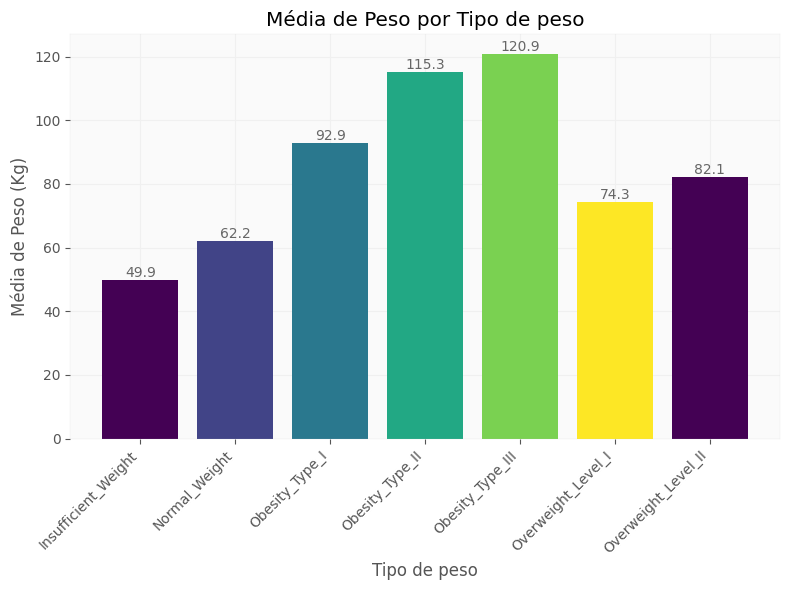

In [ ]:
# Grafico de barras com média de peso por Tipo em cores

# Define a base do gráfico:
fig, ax = plt.subplots(nrows = 1, ncols = 1, # 1 linha com 1 coluna
                        figsize = (8, 6)) # ajusta o tamanho da largura e altura do gráfico

# Mostra a média de peso com o tipo associado
tipo_peso = obesidade.groupby('NObeyesdad')['Weight'].mean().reset_index()

# Constrói o gráfico de barra
bars = ax.bar(x = tipo_peso['NObeyesdad'], height = tipo_peso['Weight'], color = coresViridis[:len(tipo_peso)])

# Adiciona os valores no topo da barra
ax.bar_label(bars, fmt="%.1f", color="#666666")

# Define labels e títulos
ax.set(xlabel = "Tipo de peso", ylabel = "Média de Peso (Kg)", title = "Média de Peso por Tipo de peso")

# Rotação do label para melhor visibilidade
plt.xticks(rotation=45, ha='right')

## Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout()

# Exibe o gráfico
plt.show()

###Gráfico da média de consumo de alimentos entre as refeições

Nesta estátisca foi selecionada a coluna de idade(Age) e verificando a média, o desvio padrão e os quartis.

###Tipos de transporte utilizados pelas pessoas nesta pesquisa

Inserir texto

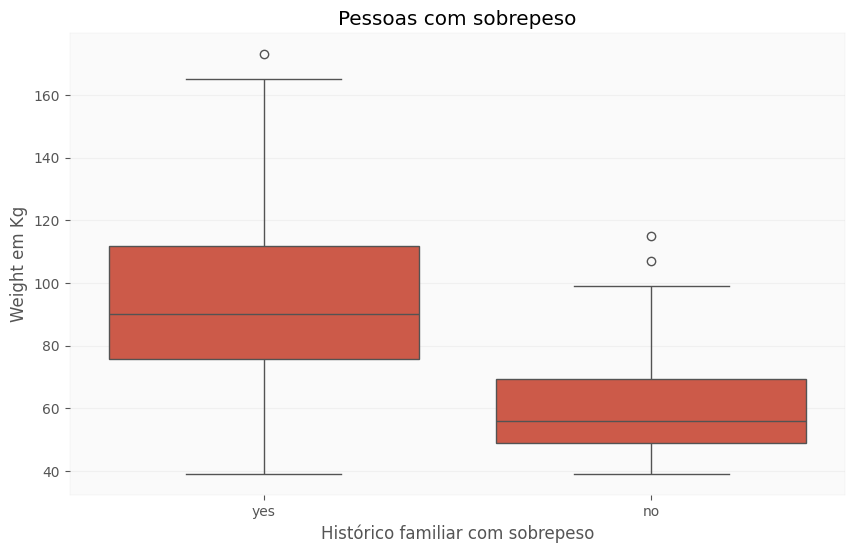

In [ ]:
# Boxplot em seaborn mostrando que há mais pessoas com sobrepeso
# com pessoas que tem sobrepeso no histórico familiar
plt.figure(figsize=(10, 6))
sns.boxplot(x='family_history_with_overweight', y='Weight', data=obesidade)
plt.title('Pessoas com sobrepeso')
plt.xlabel('Histórico familiar com sobrepeso')
plt.ylabel('Weight em Kg')
plt.show()


# Visualizações Unimodais

Histogramas com as didtribuições das variáveis e frequências

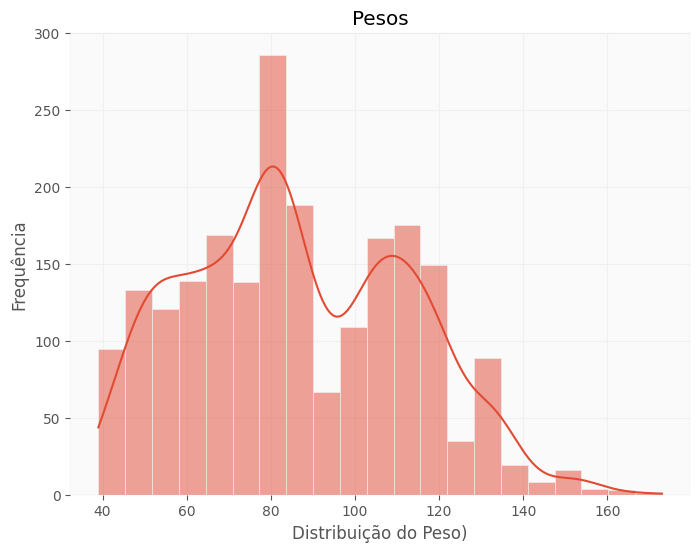

In [ ]:
plt.figure(figsize=(8, 6))
# Histograma do peso (um dos atributos)
sns.histplot(obesidade['Weight'], kde=True) # curva de densidade estimada
plt.title('Pesos')
plt.xlabel('Distribuição do Peso)')
plt.ylabel('Frequência')
plt.show()

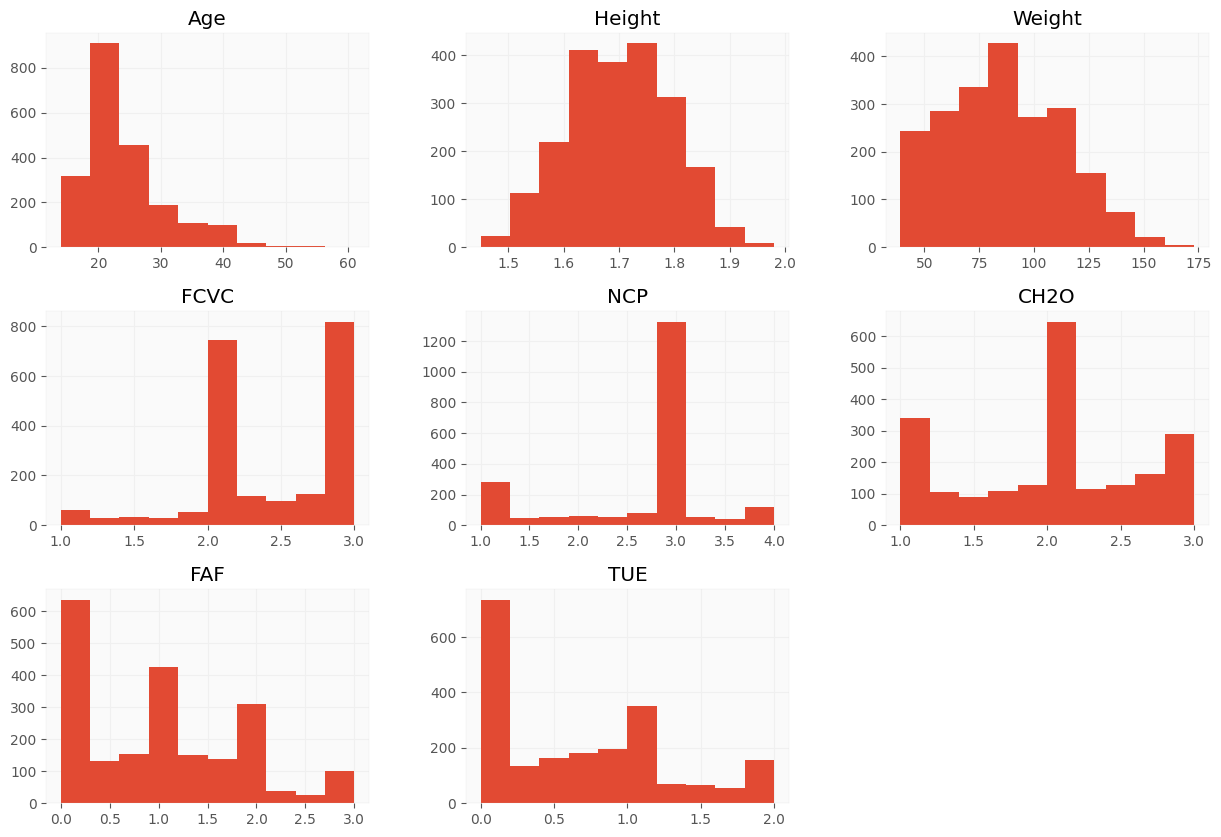

In [ ]:
# Histogramas com distribuições assimétricas e tendo picos como ex?
#Age nos 20 anos, weight 80 Kg
obesidade.hist(figsize = (15,10))

plt.show()

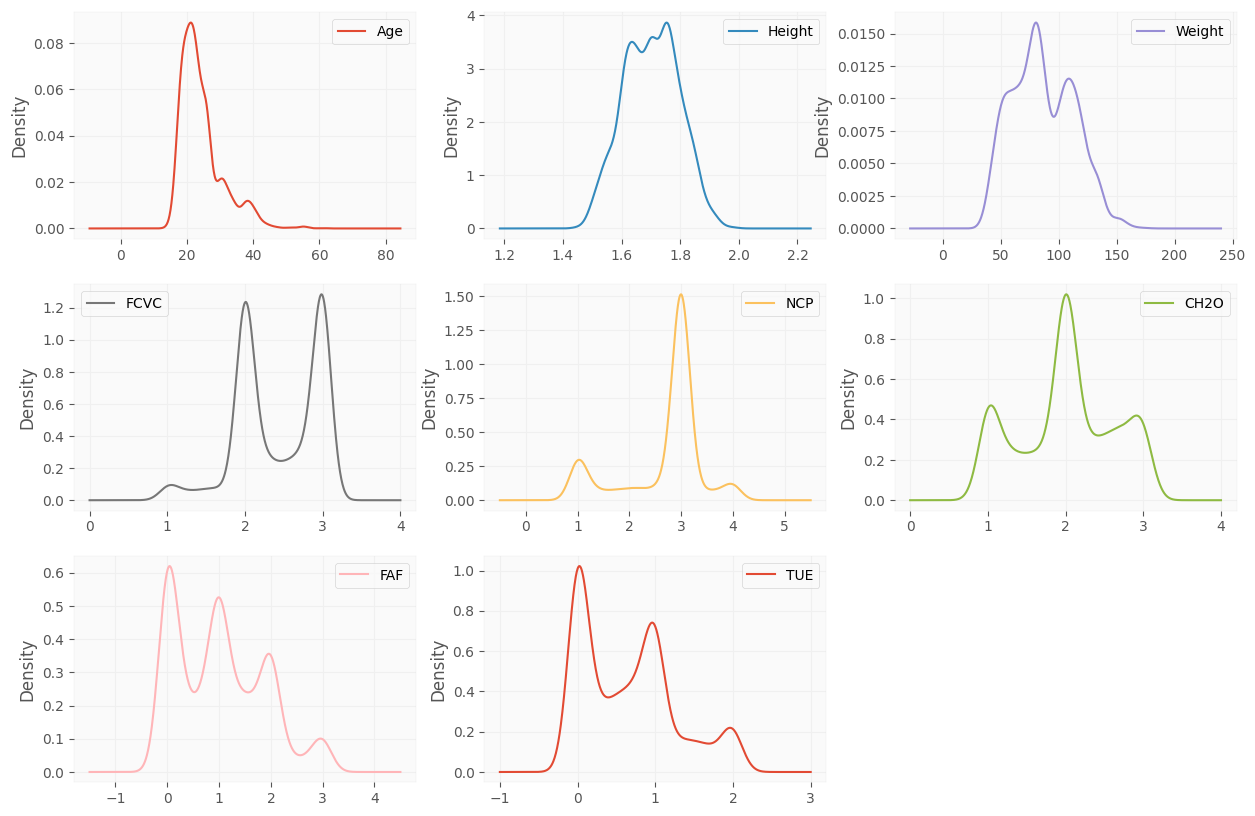

In [ ]:
# Density Plot - DESCREVER AS ANALISES DESTES GRAFICOS
obesidade.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

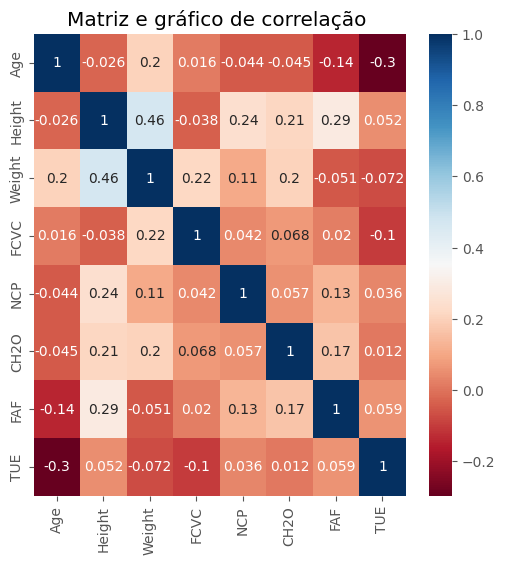

In [ ]:
# gráfico de correlação com Seaborn - DESCREVER AS ANALISES DESTES GRAFICOS
col_num = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
corr_matrix = obesidade[col_num].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu')
plt.title('Matriz e gráfico de correlação ')
plt.show()


In [ ]:
# CRIAR UM GRÁFICO DE LINHA


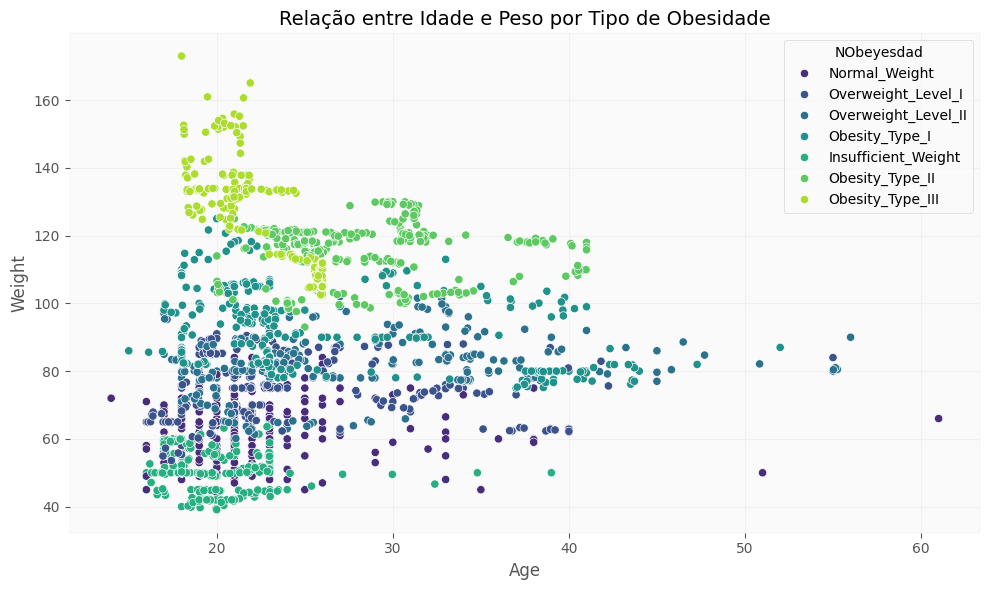

In [ ]:
# --- GRÁFICO 4: Dispersão de Idade vs. Peso (com Hue) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Weight', hue='NObeyesdad', data=obesidade, palette='viridis')
plt.title('Relação entre Idade e Peso por Tipo de Obesidade', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
# pair plot 1 com Seaborn - mostrando relacionamento entre duas variáveis
sns.pairplot(obesidade)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

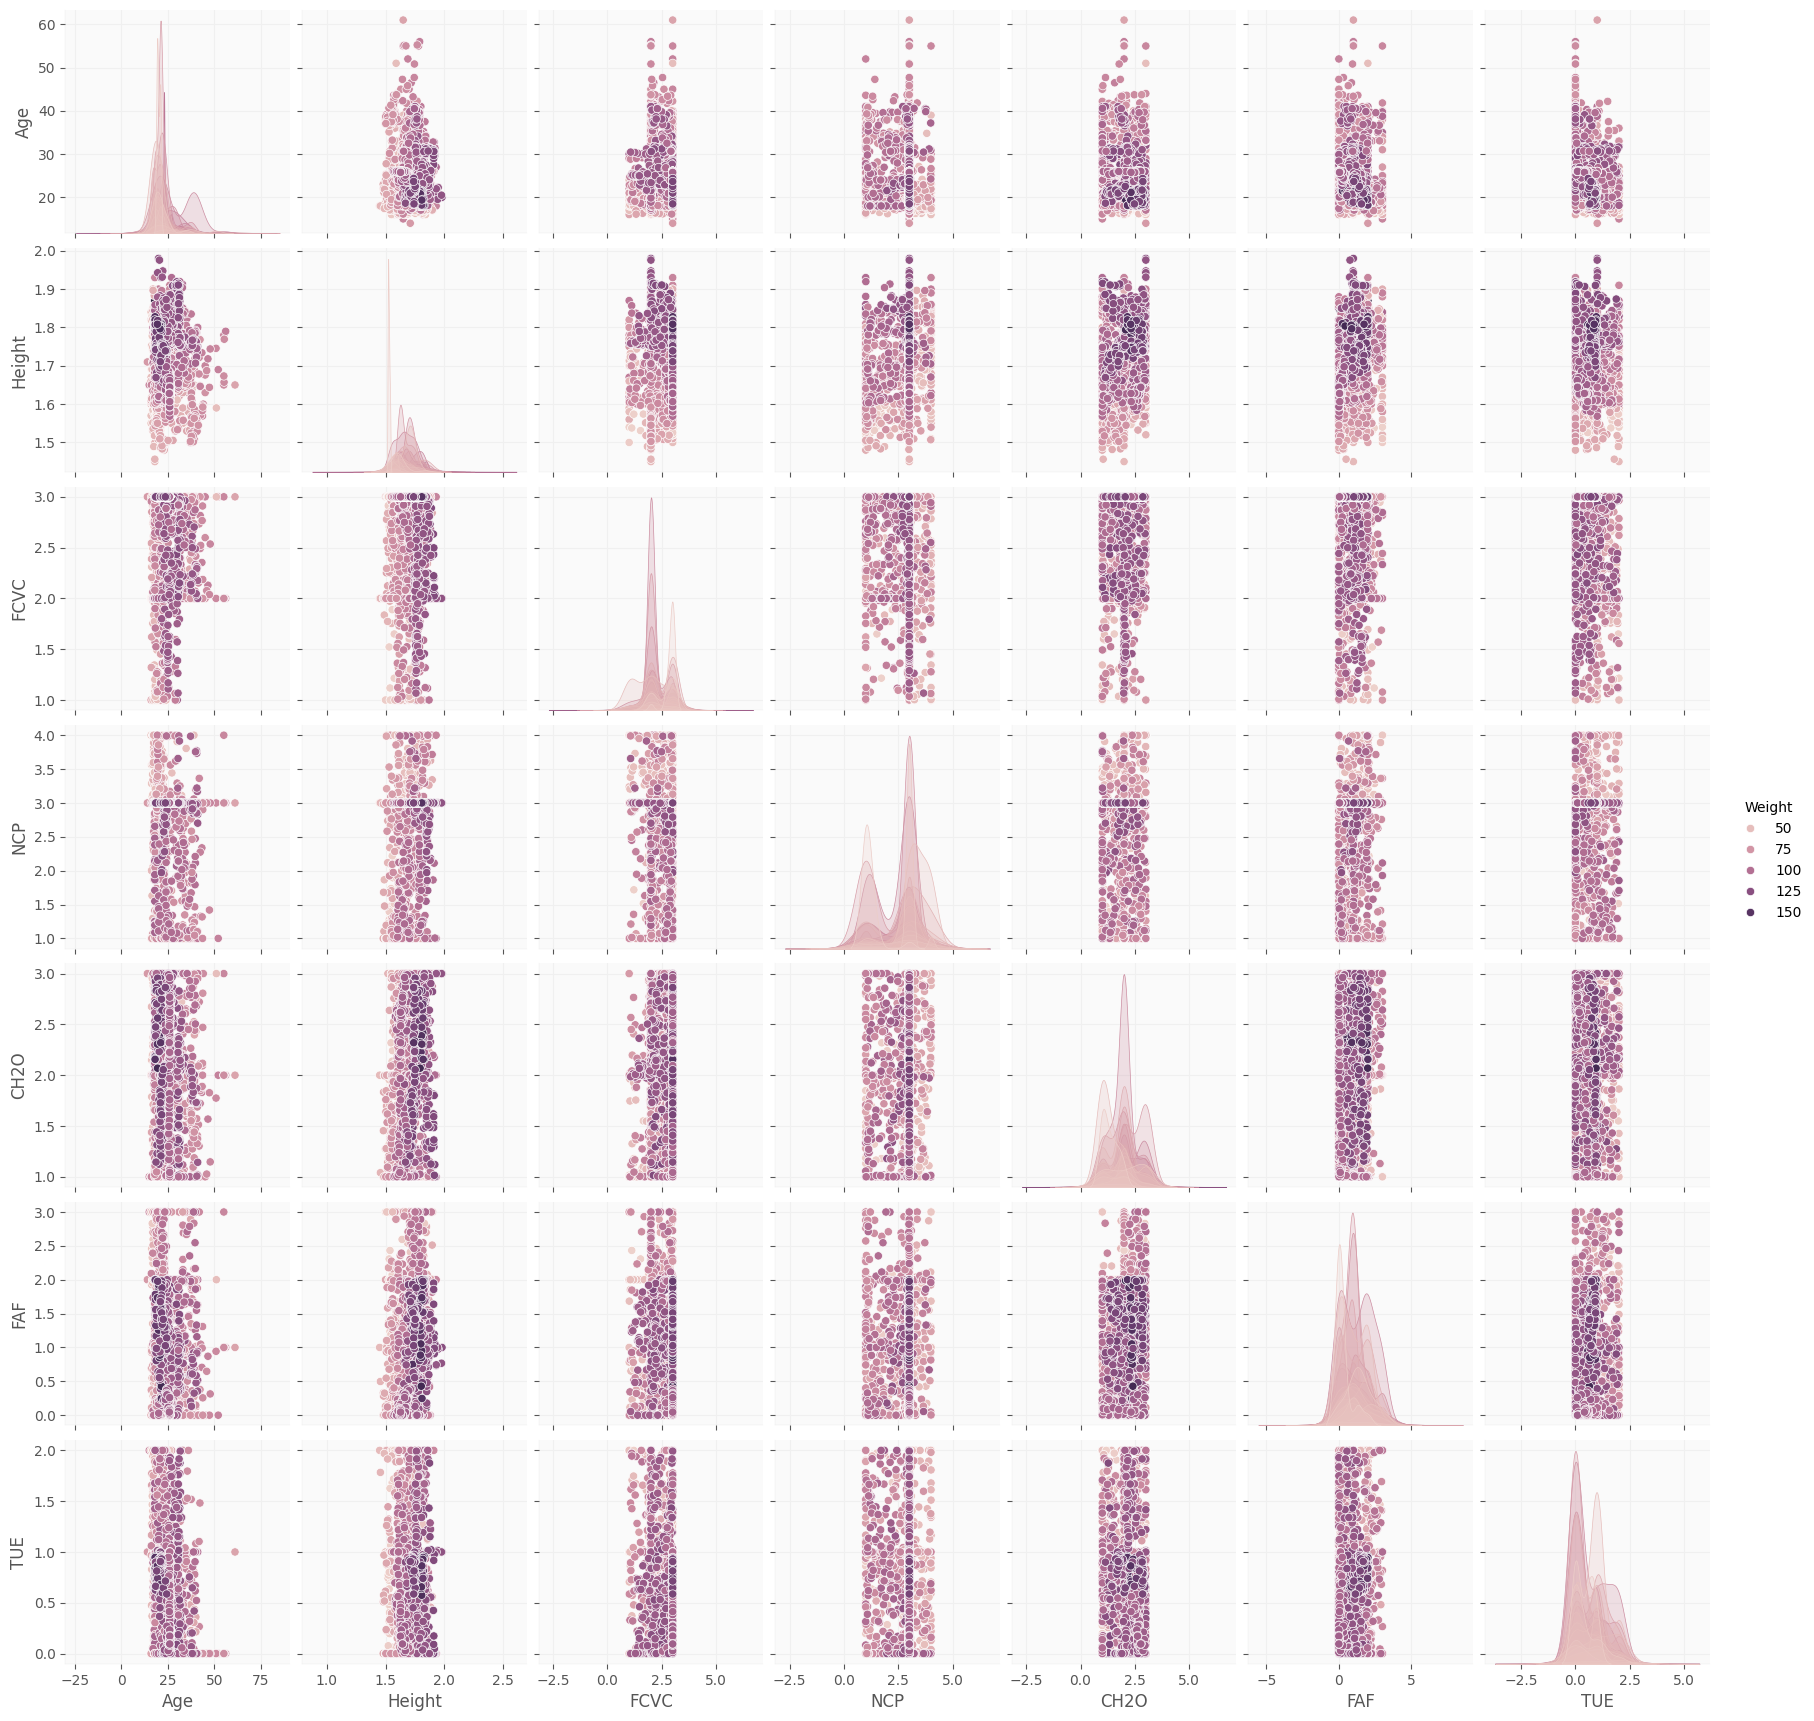

In [ ]:
# pair plot por idade com Seaborn")
sns.pairplot(obesidade, hue = "Weight")

In [ ]:
# selecionando por peso
obesidade.sort_values(by='Weight')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
395,Female,20.000000,1.540000,39.000000,yes,yes,1.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,Sometimes,Public_Transportation,Insufficient_Weight
725,Female,19.994543,1.537739,39.101805,no,yes,1.118436,3.000000,Sometimes,no,1.997744,no,2.432443,1.626194,Sometimes,Public_Transportation,Insufficient_Weight
589,Female,19.948140,1.530884,39.371523,no,yes,1.522001,3.000000,Sometimes,no,1.981260,no,2.306844,0.720454,Sometimes,Public_Transportation,Insufficient_Weight
636,Female,19.054008,1.556611,39.695295,no,yes,1.889199,2.217651,Sometimes,no,2.013605,no,2.075293,1.683261,Sometimes,Public_Transportation,Insufficient_Weight
588,Female,18.530840,1.573816,39.850137,no,yes,1.214980,1.717608,Sometimes,no,1.179942,no,0.684739,2.000000,Sometimes,Public_Transportation,Insufficient_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838,Female,20.989016,1.807340,155.872093,yes,yes,3.000000,3.000000,Sometimes,no,2.417122,no,0.952725,0.573958,Sometimes,Public_Transportation,Obesity_Type_III
1910,Female,21.521294,1.803677,160.639405,yes,yes,3.000000,3.000000,Sometimes,no,2.404049,no,0.427905,0.639894,Sometimes,Public_Transportation,Obesity_Type_III
1898,Female,19.472190,1.793824,160.935351,yes,yes,3.000000,3.000000,Sometimes,no,2.069257,no,1.986646,0.947091,Sometimes,Public_Transportation,Obesity_Type_III
502,Female,21.900120,1.843419,165.057269,yes,yes,3.000000,3.000000,Sometimes,no,2.406541,no,0.100320,0.479221,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
obesidade[obesidade['Weight'] > 100.0] # testar depois que virarem float

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
10,Male,26.000000,1.850000,105.000000,yes,yes,3.0,3.0,Frequently,no,3.000000,no,2.000000,2.000000,Sometimes,Public_Transportation,Obesity_Type_I
16,Male,27.000000,1.930000,102.000000,yes,yes,2.0,1.0,Sometimes,no,1.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
68,Male,30.000000,1.760000,112.000000,yes,yes,1.0,3.0,no,yes,2.000000,yes,0.000000,0.000000,Frequently,Automobile,Obesity_Type_II
134,Male,30.000000,1.770000,109.000000,yes,yes,3.0,3.0,Sometimes,no,1.000000,no,2.000000,0.000000,Sometimes,Automobile,Obesity_Type_I
165,Male,30.000000,1.920000,130.000000,yes,no,2.0,3.0,Sometimes,yes,1.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Obesity_Type_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Text(0.5, 0, 'Age')

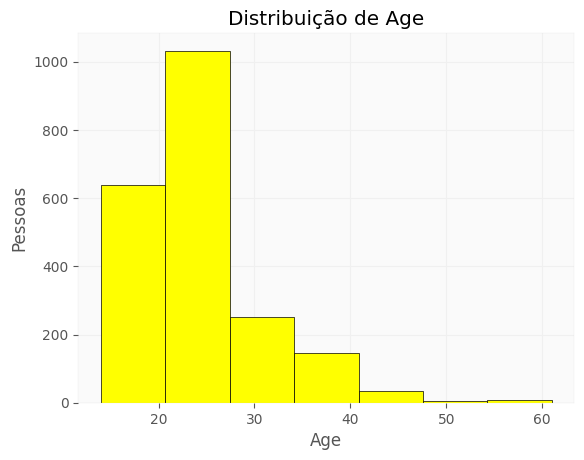

In [ ]:

# plotando o histograma
plt.hist(obesidade['Age'], bins=7, edgecolor='black', color='yellow')

# incluindo título do gráfico e legenda
plt.title('Distribuição de Age')
plt.ylabel('Pessoas')
plt.xlabel('Age')

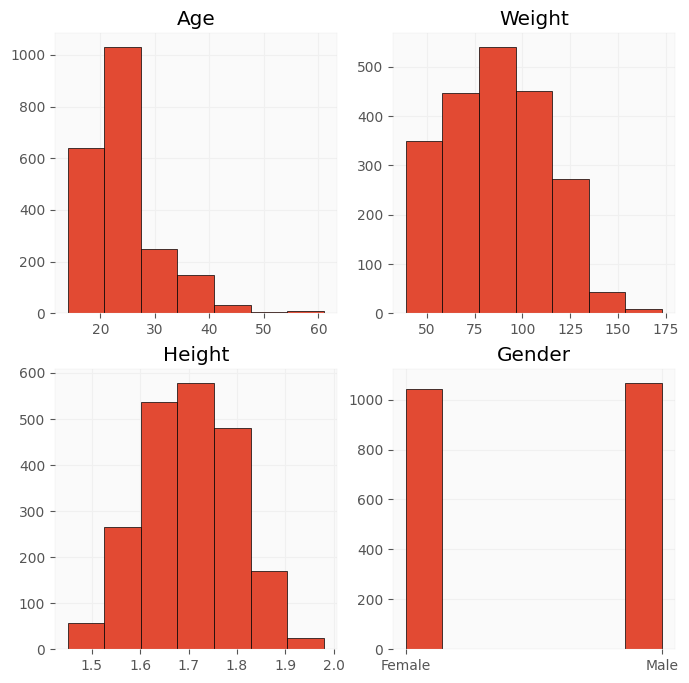

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (8, 8))

# subplot1: histograma do comprimento_sepala
ax[0,0].hist(obesidade['Age'], bins=7, edgecolor='black')
ax[0,0].set_title("Age")

# subplot2: histograma da largura_sepala
ax[0,1].hist(obesidade['Weight'], bins=7, edgecolor='black')
ax[0,1].set_title("Weight")

# subplot3: histograma do comprimento_petala
ax[1,0].hist(obesidade['Height'], bins=7, edgecolor='black')
ax[1,0].set_title("Height")

# subplot4: histograma da largura_petala
ax[1,1].hist(obesidade['Gender'], bins=7, edgecolor='black');
ax[1,1].set_title("Gender");

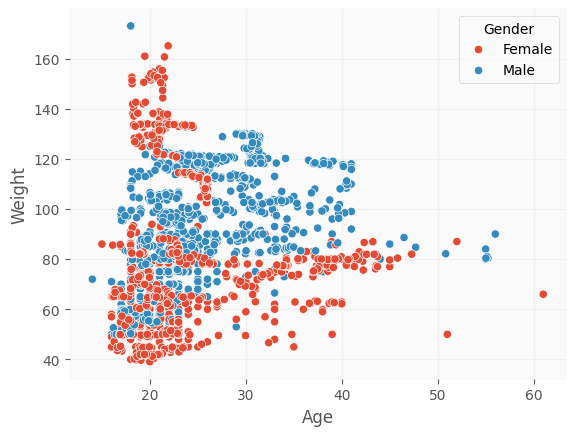

In [ ]:
# scatter plot com Seaborn
# Verifica-se que maiores pesos no feminino entre 20 e 30 anos
# E no masculino entre25 e 40 anos
sns.scatterplot(x='Age', y='Weight', hue='Gender', data=obesidade);

## 4 Pré Processamento


### 4.1 Tratamento de Missing

In [ ]:
# Mostras as ultimas linhas do dataset
obesidade.tail() # exibindo as ultimas linhas

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
obesidade.isnull().sum()
# verificando se há dados faltantes e não há dados faltantes

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


<Axes: >

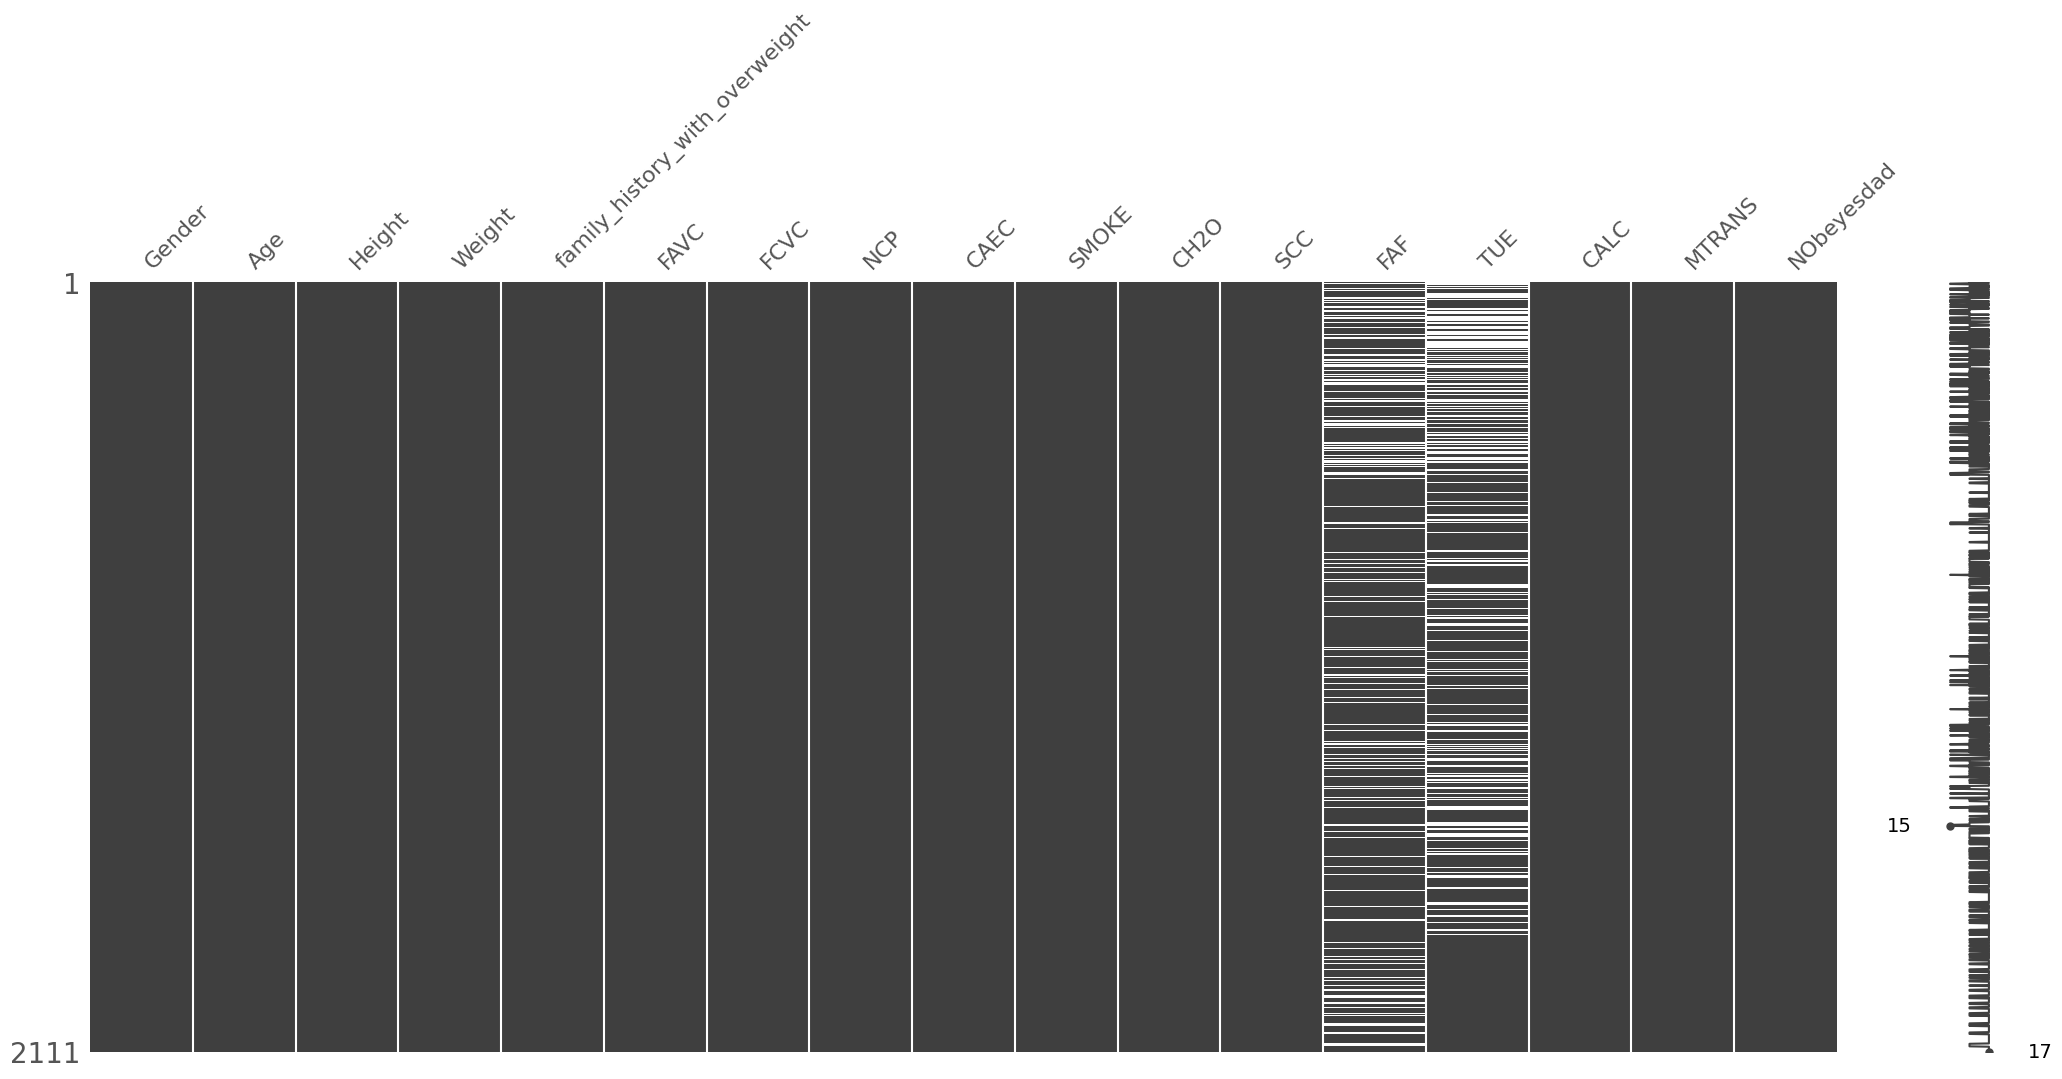

In [ ]:
# salvando um novo dataset para tratamento de dados faltantes

# recuperando os nomes das colunas
col = list(obesidade.columns)

# o novo dataset irá conter todas as colunas do dataset original
dados_obesidade_completo = obesidade[col[:]]

# substituindo os zeros por NaN
dados_obesidade_completo.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(dados_obesidade_completo)

In [ ]:
# verificando novamente nulls no dataset
dados_obesidade_completo.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


<Axes: >

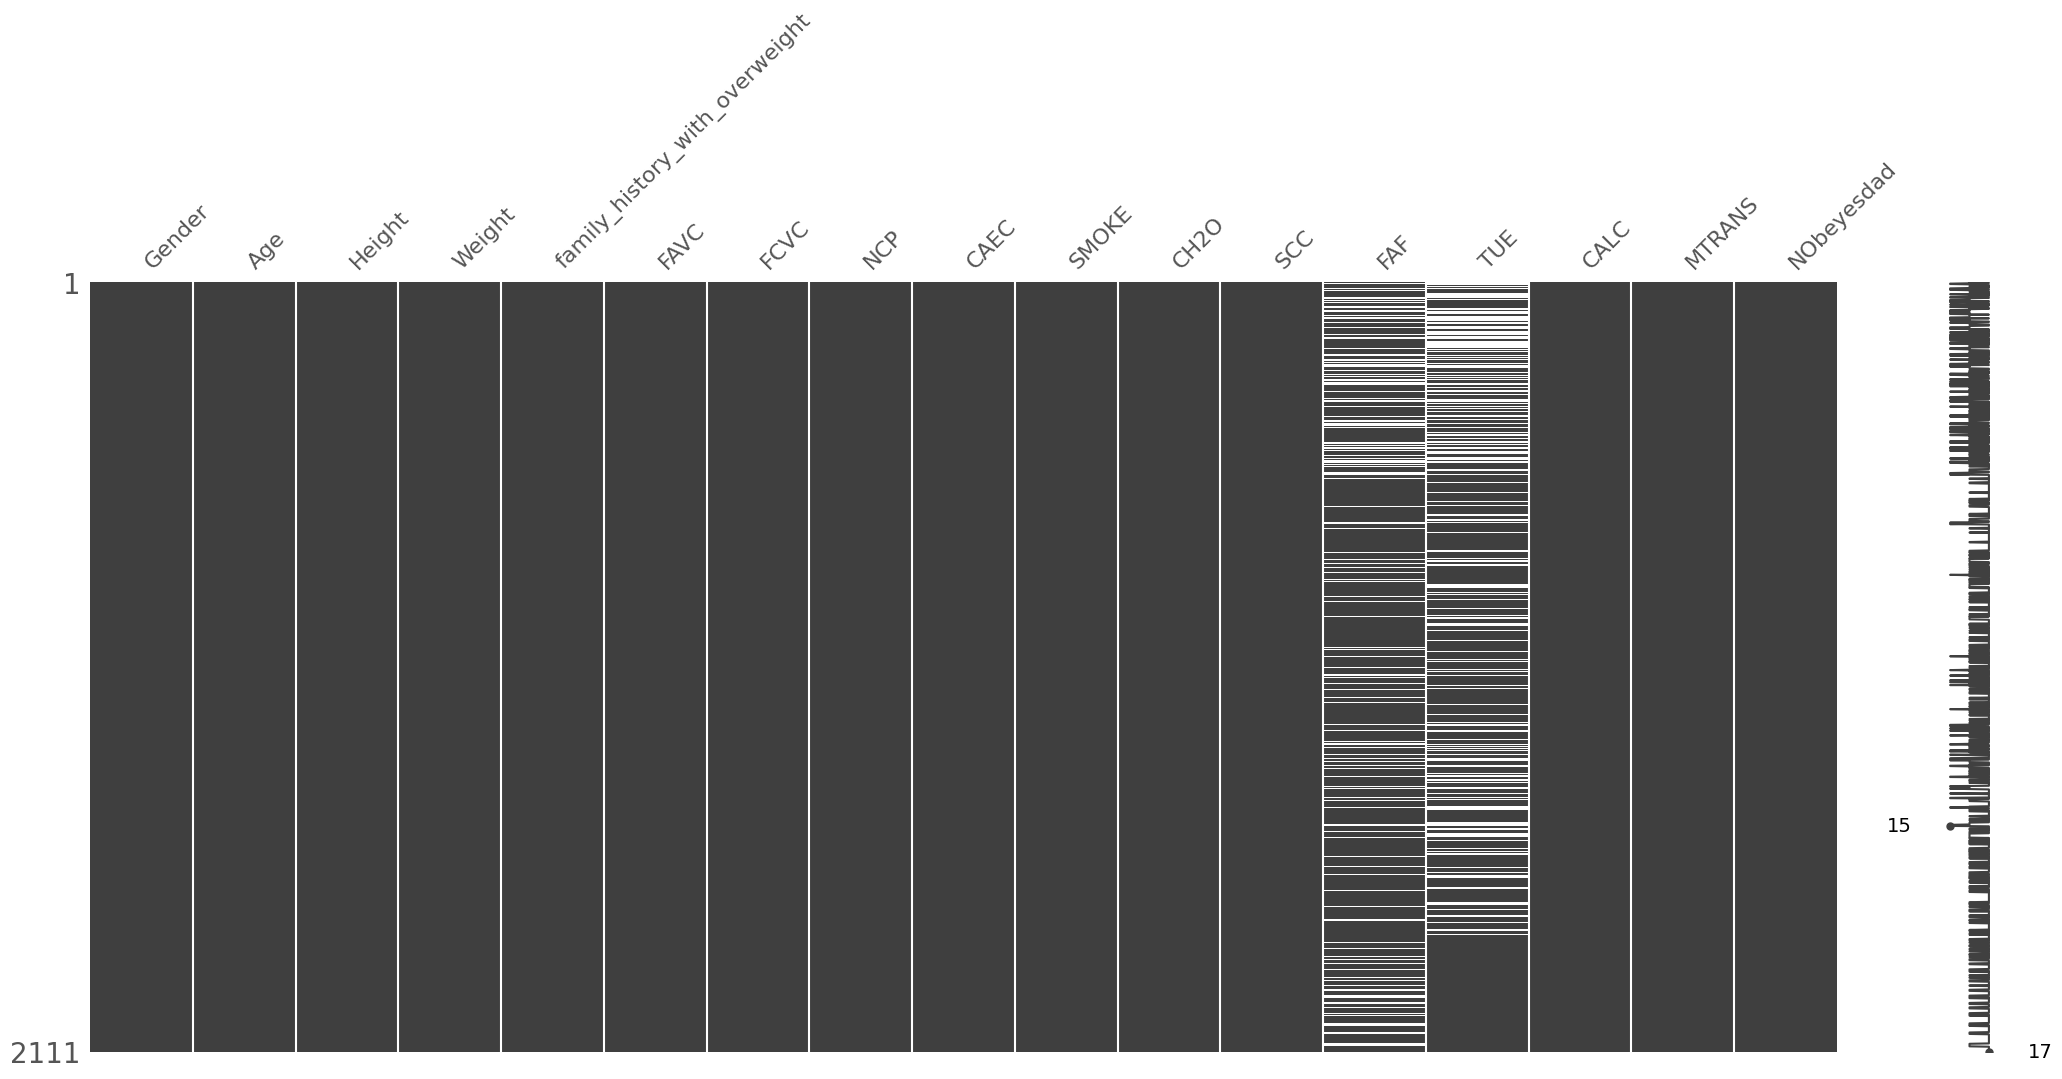

In [ ]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(dados_obesidade_completo)

<Axes: >

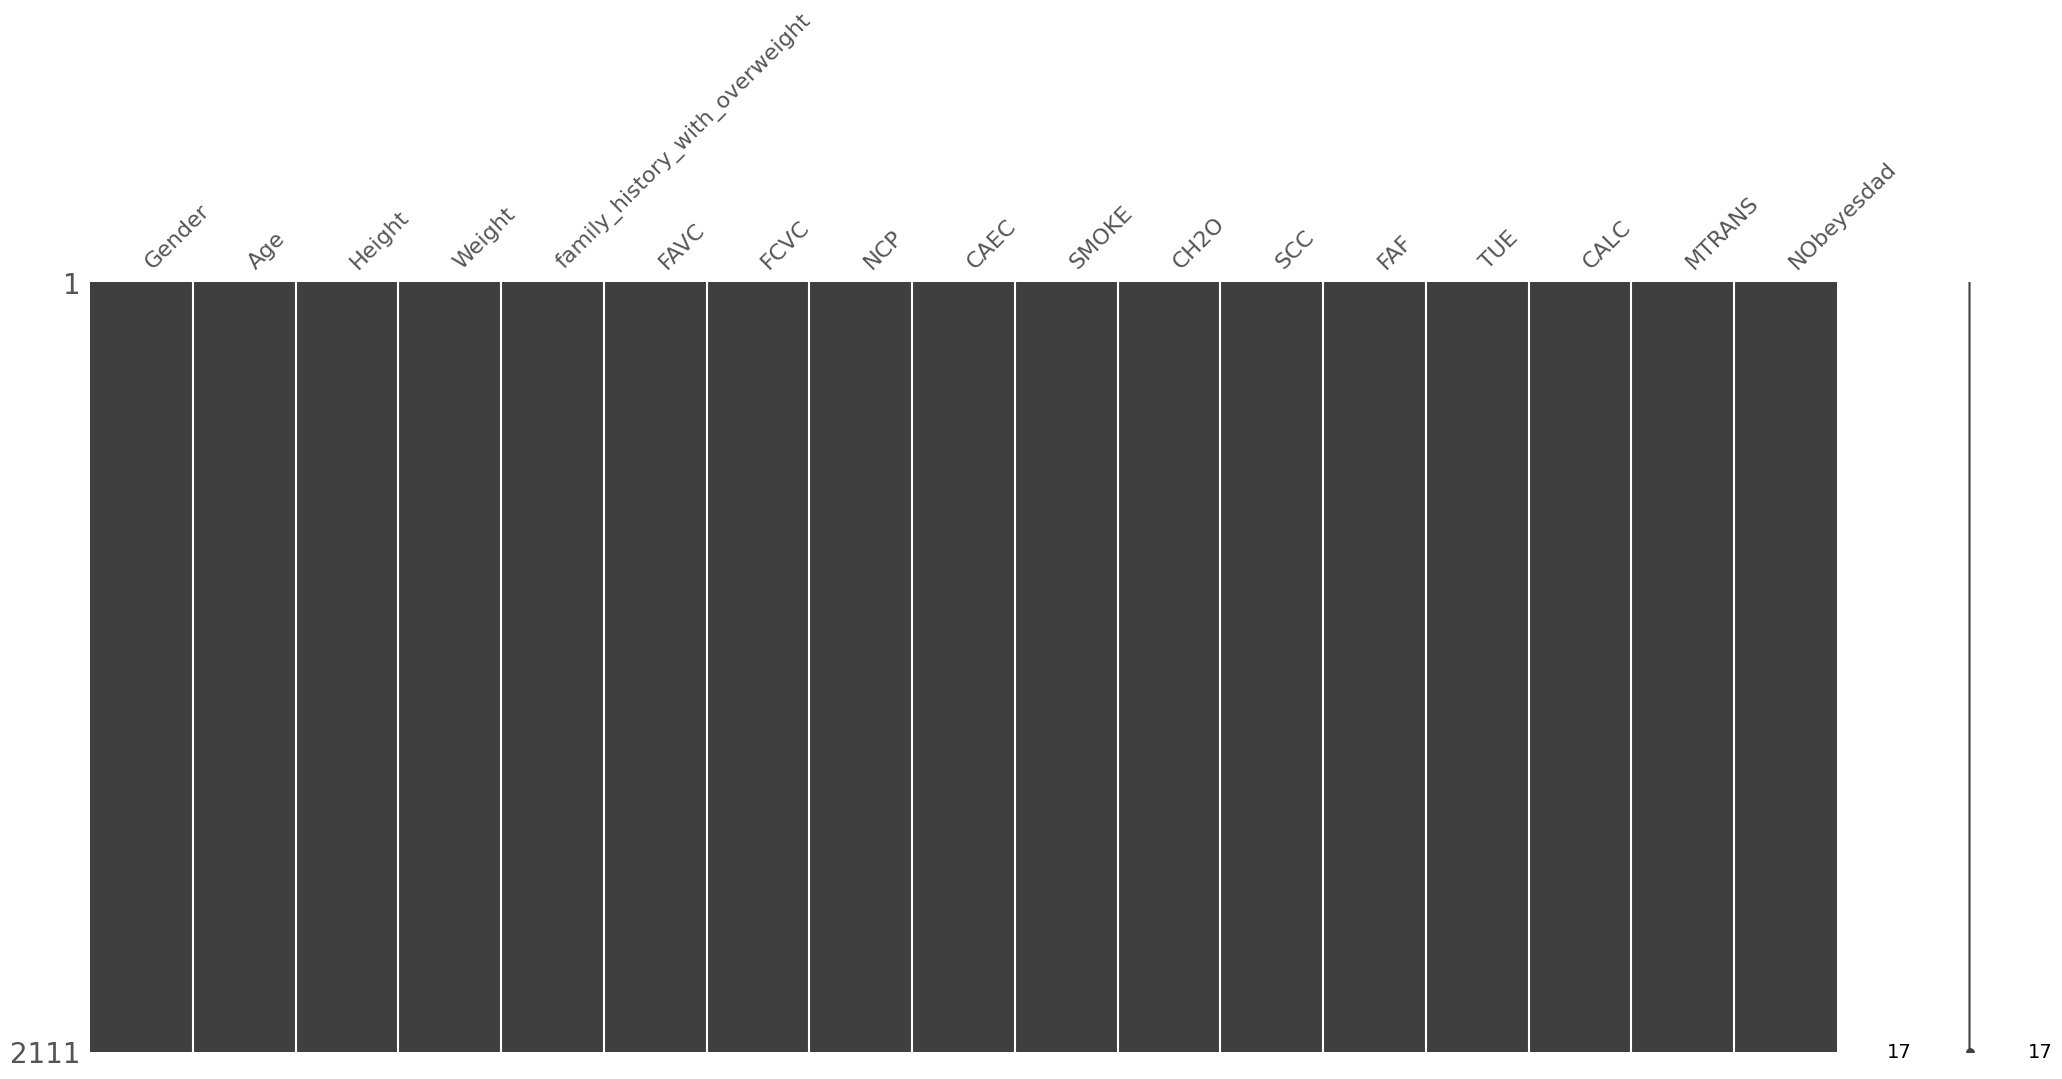

In [ ]:
# substituindo os NaN de 'FAF' e 'TUE' por 0 - voltando aos valores originais destas colunas
dados_obesidade_completo['FAF'].fillna(0, inplace=True)
dados_obesidade_completo['TUE'].fillna(0, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(dados_obesidade_completo)

In [ ]:
# exibindo as primeiras linhas
dados_obesidade_completo.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# verificando nulls no dataset tratado
dados_obesidade_completo.isnull().sum()


,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [ ]:
#Calculando o IMC (verifique unidades)
obesidade['IMC'] = obesidade['Weight'] / (obesidade['Height'] ** 2)



No gráfico mostra que  xxxxxxxxxxxxxxxxxxxxxxxx

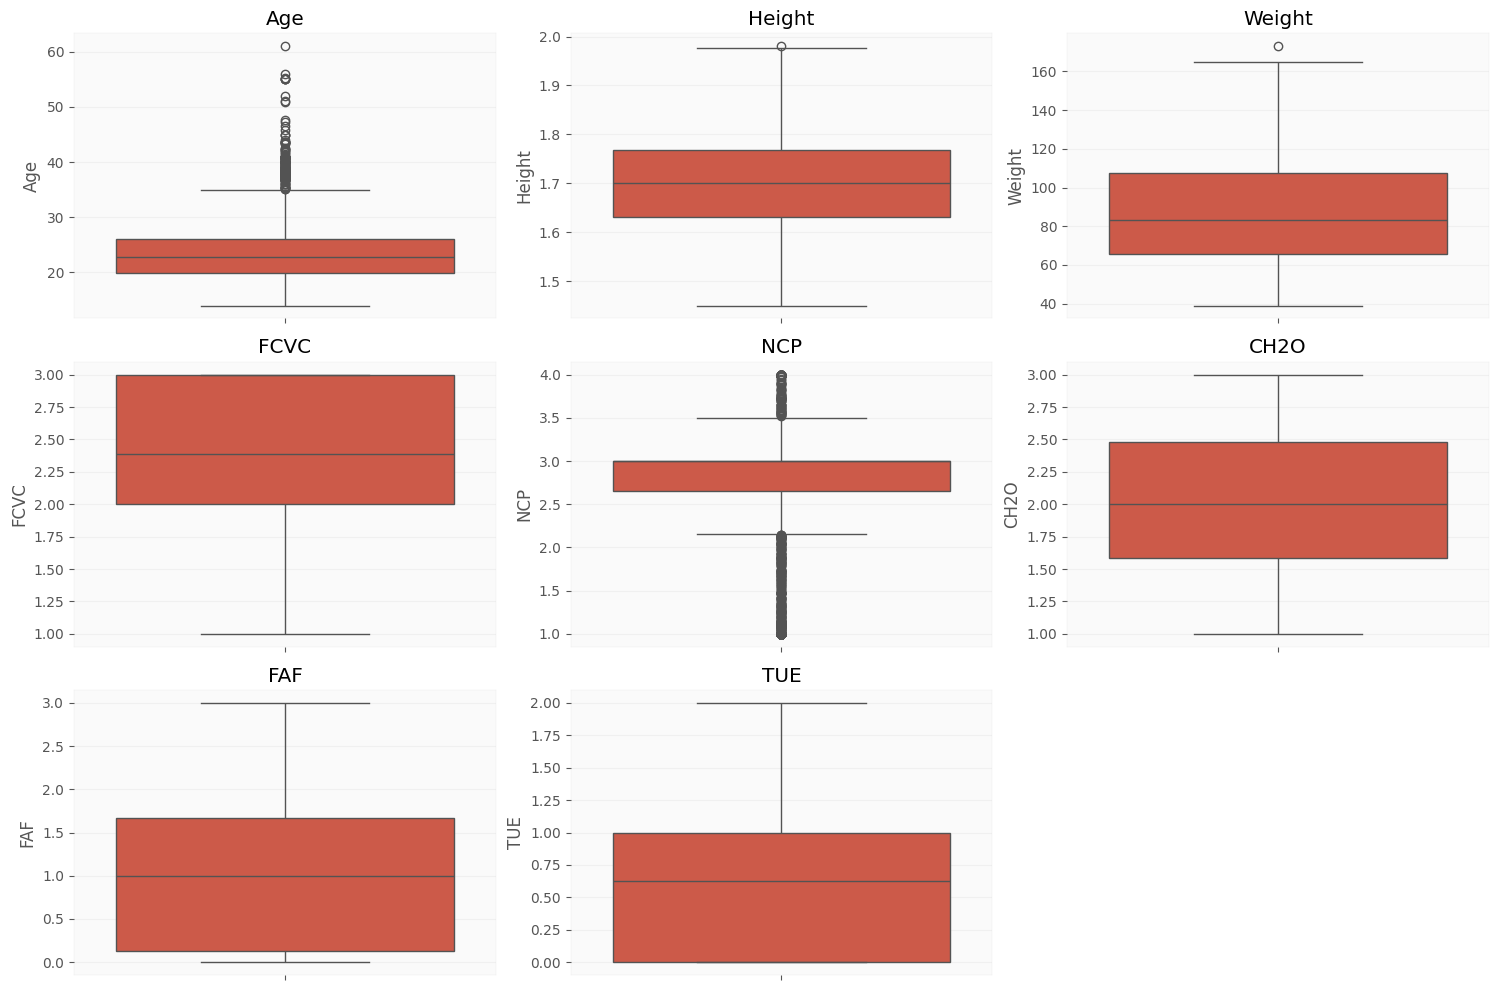

In [ ]:
# Atributos das colunas numéricas para tratar os outliers
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Gráfico mostrando os outliers em seaborn
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=obesidade[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [ ]:
# Tratando os outliers usando IQR (intervalo Interquartil)
for col in numeric_cols: # contem os nomes da coluna numérica
    Q1 = obesidade[col].quantile(0.25) # Calcula os valores que demarcam 25%
    Q3 = obesidade[col].quantile(0.75) # Calcula os valores que demarcam 75%
    IQR = Q3 - Q1 # vai representar 50% dos valores centrais
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
# utilizando o fator convencional de 1.5 Qualquer valor abaixo (lower_bound)
# ou acima (upper_bound) é considerado outlier

In [ ]:
    # Substituindo os outliers pelos limites
    obesidade[col] = np.where(obesidade[col] < lower_bound, lower_bound, obesidade[col])
    obesidade[col] = np.where(obesidade[col] > upper_bound, upper_bound, obesidade[col])


####4.2.1 Normalização


####4.2.2 Padronização

### 4.3 Transformações categóricas

### 4.3.1 Tratamento de Missing

In [ ]:
# Separando os valores do dataset em componentes de input (X) e output (Y)
X = obesidade.iloc[:, 0:-1]  # Todas as colunas menos a última
Y = obesidade.iloc[:, -1]    # Só a última coluna ('NObeyesdad')



In [ ]:
obesidade.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,IMC
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [ ]:
# Tratamento das variáveis categóricas
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
                   'SMOKE', 'SCC', 'CALC', 'MTRANS']




Label Encoding para variáveis Ordinais

###4.3.2 Codificação Ordinal





In [ ]:
# Codificação Label Encoding para variáveis ordinais
ordinal_cols = ['CAEC', 'CALC']
for col in ordinal_cols:
    le = LabelEncoder()
    obesidade[col] = le.fit_transform(obesidade[col])


###4.3.3 One Hot Encodig

In [ ]:

#Codificação One-Hot Encoding para variáveis nominais
# Lista de colunas nominais (categóricas não ordinais)
data = np.asarray([['Gender'], ['family_history_with_overweight'],['FAVC'] ,
                ['SMOKE'], ['SCC'], ['MTRANS']])

print(data)

# Aplicando one hot encoding encoding nos dados originais usando o módulo de pré-processamento
# da biblioteca scikit-learn
# definindo o transformador como one hot encoding
encoder = OneHotEncoder(sparse_output=False)



[['Gender']
 ['family_history_with_overweight']
 ['FAVC']
 ['SMOKE']
 ['SCC']
 ['MTRANS']]


In [ ]:
# transformando os dados
onehot = encoder.fit_transform(data)
print(onehot)


[[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [ ]:
# Criando faixas de idade
obesidade['Idades'] = pd.cut(obesidade['Age'], bins=[0, 20, 30, 40, 50, 60, 100],
                        labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])


In [ ]:
# Codificar a variável target
le_target = LabelEncoder()
obesidade['NObeyesdad_encoded'] = le_target.fit_transform(obesidade['NObeyesdad'])



In [ ]:
# Normalização/Padronização das features numéricas
scaler = StandardScaler()
obesidade[numeric_cols] = scaler.fit_transform(obesidade[numeric_cols])



In [ ]:
#Divisão em features e target
X = obesidade.drop(['NObeyesdad', 'NObeyesdad_encoded', 'Idades'], axis=1, errors='ignore')
y = obesidade['NObeyesdad_encoded']


In [ ]:
# Divisão em conjuntos de treino(80%) e teste(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Salvando os dados pré-processados
obesidade.to_csv('obesity_dataset_preprocessed.csv', index=False)
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
